# Super_Market_Sales_Dataset

## Objective: To find behaviour of a product and store, which impacts the sales of a products.

In [1]:
#Importing Necessary Liabrary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing DataSet

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
#Combine test_data and train_data into one file

train_data['source']='train_data'
test_data['source']='test_data'
data = pd.concat([train_data, test_data],ignore_index=True,sort=False)
print(train_data.shape, test_data.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [5]:
#Numerical data summary:

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Cleaning

In [6]:
#Check missing values:

data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Filling missing values

In [7]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train_data
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train_data
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train_data
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train_data
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train_data


In [8]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [9]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [10]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [11]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [13]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

# 1st uploas GIT

### Numerical and One-Hot Coding of Categorical variables

In [14]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [15]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [16]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train_data,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train_data,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train_data,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train_data,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train_data,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

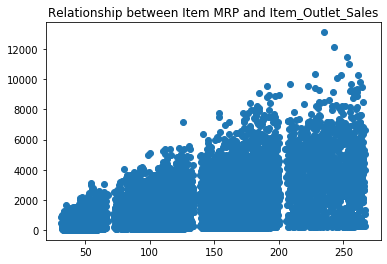

In [18]:
#Scatter plot(dot representation) to visualize the relationship between Item_MRP vs Target
plt.scatter(train_data.Item_MRP,train_data.Item_Outlet_Sales)
plt.title("Relationship between Item MRP and Item_Outlet_Sales")
plt.show()

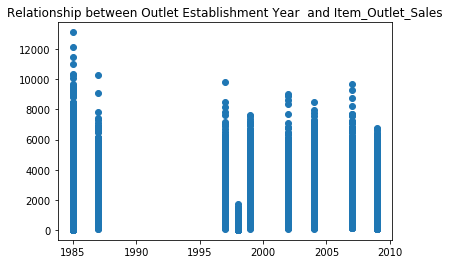

In [19]:
plt.scatter(train_data.Outlet_Establishment_Year ,train_data.Item_Outlet_Sales)
plt.title("Relationship between Outlet Establishment Year  and Item_Outlet_Sales")
plt.show()

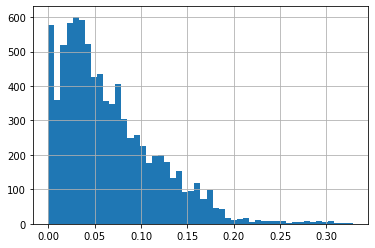

In [20]:
train_data['Item_Visibility'].hist(bins=50)

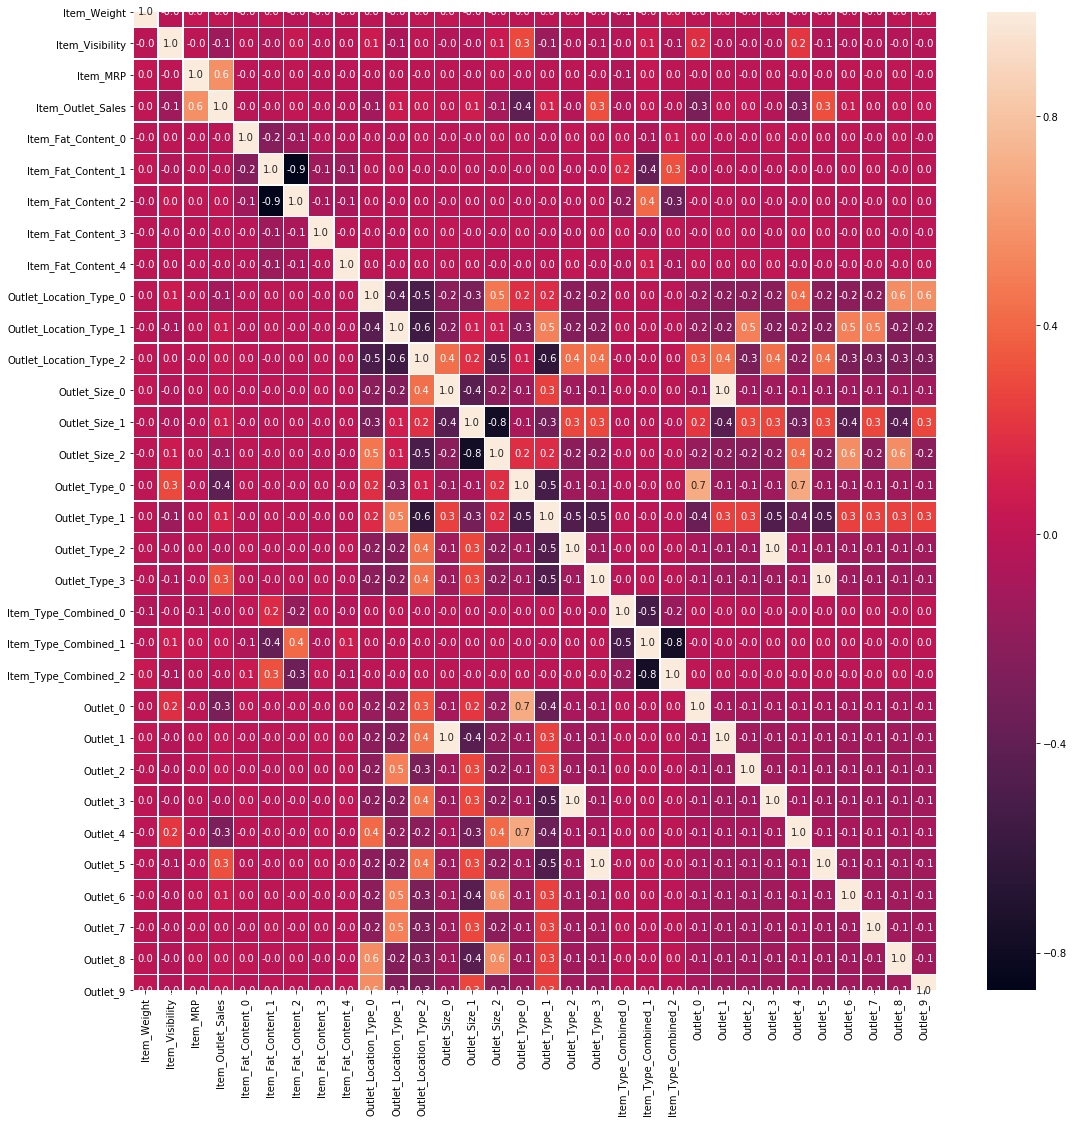

In [106]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Exporting Data

In [21]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test_data and train_data:
train_data = data.loc[data['source']=="train_data"]
test_data = data.loc[data['source']=="test_data"]

#Drop unnecessary columns:
test_data.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train_data.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train_data.to_csv("train_data_modified.csv",index=False)
test_data.to_csv("test_data_modified.csv",index=False)

# Model Building

In [22]:
# Reading modified data
train_data2 = pd.read_csv("train_data_modified.csv")
test_data2 = pd.read_csv("test_data_modified.csv")

In [23]:
train_data2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [24]:
X_train_data = train_data2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train_data = train_data2.Item_Outlet_Sales

In [25]:
X_test_data = test_data2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [26]:
X_train_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
y_train_data.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Linear Regression Model:

In [28]:
# Fitting Multiple Linear Regression to the train_dataing set

from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_data, y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)

In [30]:
y_pred

array([1848.53604783, 1472.81670435, 1875.65285894, ..., 1809.18796433,
       3565.6645235 , 1267.46171871])

In [31]:
# Measuring Accuracy

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [32]:
lr_accuracy = round(regressor.score(X_train_data,y_train_data) * 100,2)
lr_accuracy

56.36

In [33]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.563589277727048

In [34]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#Perform cross-validation:

cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.75571633 0.74509312 0.73995267 0.75255581 0.75171429]


In [35]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 1127


In [36]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [37]:
submission.to_csv('Result_1.csv',index=False)

## Decision Tree Model:

In [38]:
# Fitting Decision Tree Regression to the dataset

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train_data, y_train_data)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=300,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)
y_pred

array([1673.98398729, 1349.51290433,  471.30684669, ..., 1892.06614452,
       3805.94860417, 1349.51290433])

In [40]:
tree_accuracy = round(regressor.score(X_train_data,y_train_data),2)
tree_accuracy

0.59

In [41]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.5884050821570486

In [42]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.76166126 0.74999795 0.72145219 0.75916104 0.75750393]


In [43]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 1095


In [44]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [45]:
submission.to_csv('Result_2.csv',index=False)

## Random Forest Model:

In [46]:
# Fitting Random Forest Regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train_data, y_train_data)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [47]:
# Predicting the test_data set results

y_pred = regressor.predict(X_test_data)
y_pred

array([1657.6831296 , 1361.69182507,  601.57210661, ..., 1952.68762783,
       3668.79559418, 1302.92248444])

In [48]:
rf_accuracy = round(regressor.score(X_train_data,y_train_data),2)
rf_accuracy

0.61

In [49]:
r2_score(y_train_data, regressor.predict(X_train_data))

0.6126764224220893

In [50]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train_data, y_train_data, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.78030431 0.76621868 0.75897468 0.78005474 0.7790235 ]


In [51]:
import sklearn.metrics as metrics
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train_data, regressor.predict(X_train_data))))

RMSE : 1062


In [52]:
submission = pd.DataFrame({
'Item_Identifier':test_data2['Item_Identifier'],
'Outlet_Identifier':test_data2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [53]:
submission.to_csv('Result_3.csv',index=False)